In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np

In [2]:
data_df = pd.read_csv("Dataset/ca-dealers-used.csv")
data_df.head()

C:\Users\tranb\AppData\Local\Temp\ipykernel_21376\1536680829.py:1: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("Dataset/ca-dealers-used.csv")


,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,b39ea795-eca9,19UNC1B01HY800062,179999.0,9966.0,V-P4139,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,edmundston honda,475 Rue Victoria,Edmundston,NB,E3V 2K7
1,026cb5b1-6e3e,19UNC1B02HY800023,179995.0,5988.0,PPAP70374,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,garage daniel lessard,2795 Route-du-prsident-kennedy,Notre-dame-des-pins,QC,G0M 1K0
2,5cd5d5b2-5cc2,19UNC1B02HY800071,168528.0,24242.0,B21085,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,lougheed acura,1388 Lougheed Highway,Coquitlam,BC,V3K 6S4
3,b32473ed-5922,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,drive autogroup,1305 Parkway Suite 600,Pickering,ON,L1V 3P2
4,ac40c9fc-0676,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,acura pickering,575 Kingston Road,Pickering,ON,L1V 3N7


In [3]:
data_df['engine_block'].unique()

array(['V', 'I', nan, 'H'], dtype=object)

In [4]:
clean_df = data_df[["make","model","year","fuel_type","state","miles","price","engine_size","body_type","city","state"]]
clean_df

,make,model,year,fuel_type,state,miles,price,engine_size,body_type,city,state
0,Acura,NSX,2017.0,Electric / Premium Unleaded,NB,9966.0,179999.0,3.5,Coupe,Edmundston,NB
1,Acura,NSX,2017.0,Electric / Premium Unleaded,QC,5988.0,179995.0,3.5,Coupe,Notre-dame-des-pins,QC
2,Acura,NSX,2017.0,Electric / Premium Unleaded,BC,24242.0,168528.0,3.5,Coupe,Coquitlam,BC
3,Acura,NSX,2020.0,Electric / Premium Unleaded,ON,6637.0,220000.0,3.5,Coupe,Pickering,ON
4,Acura,NSX,2020.0,Electric / Premium Unleaded,ON,6637.0,220000.0,3.5,Coupe,Pickering,ON
...,...,...,...,...,...,...,...,...,...,...,...
393598,Mercedes-Benz,GLC-Class,2019.0,Electric / Unleaded,QC,22108.0,47995.0,2.0,SUV,Granby,QC
393599,Mercedes-Benz,GLC-Class,2018.0,Electric / Unleaded,QC,55316.0,42995.0,2.0,SUV,Brossard,QC
393600,Mercedes-Benz,GLC-Class,2018.0,Electric / Unleaded,QC,55316.0,42995.0,2.0,SUV,La Prairie,QC
393601,Porsche,Cayenne Coupe,2020.0,Electric / Unleaded,MB,NaN,115995.0,3.0,SUV,Winnipeg,MB


In [5]:
unique_brands = clean_df["make"].unique()
unique_brands

array(['Acura', 'Dodge', 'Chrysler', 'RAM', 'Ford', 'Chevrolet', 'Buick',
       'Cadillac', 'GMC', 'Nissan', 'Lexus', 'Volkswagen', 'BMW',
       'Mercedes-Benz', 'Toyota', 'Hummer', 'Lincoln', 'Volvo',
       'INFINITI', 'Land Rover', 'Bentley', 'Audi', 'MINI', 'Porsche',
       'Maserati', 'Am General', 'Honda', 'Jeep', 'Pontiac', 'Oldsmobile',
       'Saturn', 'Eagle', 'Mazda', 'Mercury', 'Hyundai', 'Suzuki', 'FIAT',
       'Kia', 'Scion', 'Mitsubishi', 'Subaru', 'Isuzu', 'smart', 'Tesla',
       'Saab', 'GENESIS', 'Jaguar', 'McLaren', 'Rolls-Royce', 'Lotus',
       'Aston Martin', 'Lamborghini', 'Alfa Romeo', 'Ferrari', 'Plymouth',
       'Maybach', 'KARMA'], dtype=object)

In [6]:
data_2_df = pd.read_csv("Dataset/Fuel_Consumption_2000-2022.csv")
data_2_df = data_2_df[["YEAR", "MAKE", "MODEL","FUEL","FUEL CONSUMPTION", "HWY (L/100 km)","COMB (L/100 km)", "COMB (mpg)", "EMISSIONS"]]
data_2_df = data_2_df.rename(columns={"MODEL":"model","MAKE":"make","YEAR":"year","FUEL": "fuel_type"})
data_2_df['fuel_type'] = data_2_df['fuel_type'].replace({'X': 'Unleaded','Z' : 'Premium Unleaded', 'E' : 'Electric','D' : 'Diesel'})


In [7]:
merge_df = pd.merge(clean_df,data_2_df,how = "outer",on = ["make","model","year","fuel_type"])
merge_df

,make,model,year,fuel_type,state,miles,price,engine_size,body_type,city,state,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,Acura,NSX,2017.0,Electric / Premium Unleaded,NB,9966.0,179999.0,3.5,Coupe,Edmundston,NB,NaN,NaN,NaN,NaN,NaN
1,Acura,NSX,2017.0,Electric / Premium Unleaded,QC,5988.0,179995.0,3.5,Coupe,Notre-dame-des-pins,QC,NaN,NaN,NaN,NaN,NaN
2,Acura,NSX,2017.0,Electric / Premium Unleaded,BC,24242.0,168528.0,3.5,Coupe,Coquitlam,BC,NaN,NaN,NaN,NaN,NaN
3,Acura,NSX,2017.0,Electric / Premium Unleaded,QC,18281.0,155771.0,3.5,Coupe,Montral,QC,NaN,NaN,NaN,NaN,NaN
4,Acura,NSX,2017.0,Electric / Premium Unleaded,QC,18281.0,155771.0,3.5,Coupe,Montral,QC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464898,Volvo,XC40 T5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,7.7,9.4,30.0,219.0
464899,Volvo,XC60 B5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,8.1,9.4,30.0,219.0
464900,Volvo,XC60 B6 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.7,9.9,29.0,232.0
464901,Volvo,XC90 T5 AWD,2022.0,Premium Unleaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,8.4,10.1,28.0,236.0


In [8]:
manufacturer_df = pd.read_csv("Dataset/manufacturers_1.csv")
manufacturer_df["make"] = manufacturer_df["make"].str.title()
manufacturer_df

final_df = pd.merge(merge_df,manufacturer_df[["make","country"]],on = "make")
final_df = final_df.dropna()
final_df.head()


,make,model,year,fuel_type,state,miles,price,engine_size,body_type,city,state,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,country
1793,Acura,ILX,2018.0,Premium Unleaded,ON,39000.0,19999.0,2.4,Sedan,London,ON,9.4,6.8,8.2,34.0,192.0,Japan
1794,Acura,ILX,2018.0,Premium Unleaded,NS,25661.0,23240.0,2.4,Sedan,Halifax,NS,9.4,6.8,8.2,34.0,192.0,Japan
1795,Acura,ILX,2018.0,Premium Unleaded,ON,21675.0,20999.0,2.4,Sedan,Chatham-kent,ON,9.4,6.8,8.2,34.0,192.0,Japan
1796,Acura,ILX,2018.0,Premium Unleaded,ON,21675.0,21999.0,2.4,Sedan,Leamington,ON,9.4,6.8,8.2,34.0,192.0,Japan
1797,Acura,ILX,2018.0,Premium Unleaded,QC,32144.0,22776.0,2.4,Sedan,Montral,QC,9.4,6.8,8.2,34.0,192.0,Japan


In [9]:
final_tweak_df = final_df.loc[(final_df["year"] >= 2017) & ((final_df["year"] <= 2022)),:]
final_tweak_df

,make,model,year,fuel_type,state,miles,price,engine_size,body_type,city,state,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,country
1793,Acura,ILX,2018.0,Premium Unleaded,ON,39000.0,19999.0,2.4,Sedan,London,ON,9.4,6.8,8.2,34.0,192.0,Japan
1794,Acura,ILX,2018.0,Premium Unleaded,NS,25661.0,23240.0,2.4,Sedan,Halifax,NS,9.4,6.8,8.2,34.0,192.0,Japan
1795,Acura,ILX,2018.0,Premium Unleaded,ON,21675.0,20999.0,2.4,Sedan,Chatham-kent,ON,9.4,6.8,8.2,34.0,192.0,Japan
1796,Acura,ILX,2018.0,Premium Unleaded,ON,21675.0,21999.0,2.4,Sedan,Leamington,ON,9.4,6.8,8.2,34.0,192.0,Japan
1797,Acura,ILX,2018.0,Premium Unleaded,QC,32144.0,22776.0,2.4,Sedan,Montral,QC,9.4,6.8,8.2,34.0,192.0,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434803,Alfa Romeo,Stelvio,2020.0,Premium Unleaded,ON,5095.0,53888.0,2.0,SUV,Toronto,ON,10.3,8.1,9.3,30.0,218.0,Italy
434805,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,AB,90.0,67719.0,2.0,SUV,Edmonton,AB,10.3,8.1,9.3,30.0,218.0,Italy
434806,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,AB,90.0,67719.0,2.0,SUV,Calgary,AB,10.3,8.1,9.3,30.0,218.0,Italy
434807,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,AB,90.0,80859.0,2.0,SUV,Edmonton,AB,10.3,8.1,9.3,30.0,218.0,Italy


In [10]:
final_tweak_df.rename(columns={'make': 'BRAND', 'model':'MODEL', 'year':'YEAR','fuel_type':'FUEL TYPE',
                       'state':'STATE', 'miles':'MILES','price': 'PRICE', 'engine_size':'ENGINE SIZE',	
                       'body_type':'BODY TYPE', 'city':'CITY','country':'COUNTRY'}, inplace=True)
final_tweak_df.drop('STATE', axis=1, inplace=True)                      
final_tweak_df

,BRAND,MODEL,YEAR,FUEL TYPE,MILES,PRICE,ENGINE SIZE,BODY TYPE,CITY,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,COUNTRY
1793,Acura,ILX,2018.0,Premium Unleaded,39000.0,19999.0,2.4,Sedan,London,9.4,6.8,8.2,34.0,192.0,Japan
1794,Acura,ILX,2018.0,Premium Unleaded,25661.0,23240.0,2.4,Sedan,Halifax,9.4,6.8,8.2,34.0,192.0,Japan
1795,Acura,ILX,2018.0,Premium Unleaded,21675.0,20999.0,2.4,Sedan,Chatham-kent,9.4,6.8,8.2,34.0,192.0,Japan
1796,Acura,ILX,2018.0,Premium Unleaded,21675.0,21999.0,2.4,Sedan,Leamington,9.4,6.8,8.2,34.0,192.0,Japan
1797,Acura,ILX,2018.0,Premium Unleaded,32144.0,22776.0,2.4,Sedan,Montral,9.4,6.8,8.2,34.0,192.0,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434803,Alfa Romeo,Stelvio,2020.0,Premium Unleaded,5095.0,53888.0,2.0,SUV,Toronto,10.3,8.1,9.3,30.0,218.0,Italy
434805,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Edmonton,10.3,8.1,9.3,30.0,218.0,Italy
434806,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Calgary,10.3,8.1,9.3,30.0,218.0,Italy
434807,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,80859.0,2.0,SUV,Edmonton,10.3,8.1,9.3,30.0,218.0,Italy


In [13]:
final_tweak_df['COUNTRY'].unique()

array(['Japan', 'USA', 'Germany', 'UK', 'Italy', 'South Korea'],
      dtype=object)

In [11]:
country_grp_df = final_tweak_df.set_index('COUNTRY')
country_grp_df

,BRAND,MODEL,YEAR,FUEL TYPE,MILES,PRICE,ENGINE SIZE,BODY TYPE,CITY,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
COUNTRY,,,,,,,,,,,,,,
Japan,Acura,ILX,2018.0,Premium Unleaded,39000.0,19999.0,2.4,Sedan,London,9.4,6.8,8.2,34.0,192.0
Japan,Acura,ILX,2018.0,Premium Unleaded,25661.0,23240.0,2.4,Sedan,Halifax,9.4,6.8,8.2,34.0,192.0
Japan,Acura,ILX,2018.0,Premium Unleaded,21675.0,20999.0,2.4,Sedan,Chatham-kent,9.4,6.8,8.2,34.0,192.0
Japan,Acura,ILX,2018.0,Premium Unleaded,21675.0,21999.0,2.4,Sedan,Leamington,9.4,6.8,8.2,34.0,192.0
Japan,Acura,ILX,2018.0,Premium Unleaded,32144.0,22776.0,2.4,Sedan,Montral,9.4,6.8,8.2,34.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Italy,Alfa Romeo,Stelvio,2020.0,Premium Unleaded,5095.0,53888.0,2.0,SUV,Toronto,10.3,8.1,9.3,30.0,218.0
Italy,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Edmonton,10.3,8.1,9.3,30.0,218.0
Italy,Alfa Romeo,Stelvio,2021.0,Premium Unleaded,90.0,67719.0,2.0,SUV,Calgary,10.3,8.1,9.3,30.0,218.0


In [12]:
country_grp_df['ENGINE SIZE'].unique()

array([2.4, 3.5, 3.6, 5.7, 6.2, 6.4, 3. , 2.3, 1. , 2. , 1.5, 2.5, 2.7,
       1.6, 2.8, 1.4, 1.8, 5.3, 1.2, 1.3, 5.6, 4. , 3.8, 3.7, 4.6, 6. ,
       2.9, 5.2, 3.2, 3.3, 6.6, 6.7, 5.9])

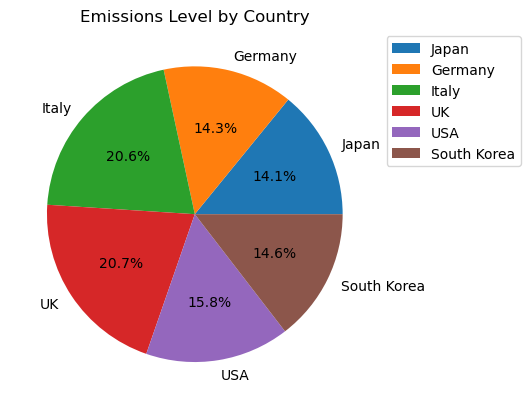

In [14]:
# Generate the mean of emissions level in each country
japan_cars_df = country_grp_df.loc['Japan']['EMISSIONS'].mean()
germany_cars_df = country_grp_df.loc['Germany']['EMISSIONS'].mean()
italy_cars_df = country_grp_df.loc['Italy']['EMISSIONS'].mean()
uk_cars_df = country_grp_df.loc['UK']['EMISSIONS'].mean()
usa_cars_df = country_grp_df.loc['USA']['EMISSIONS'].mean()
korea_cars_df = country_grp_df.loc['South Korea']['EMISSIONS'].mean()
total_emissions = [japan_cars_df, germany_cars_df, italy_cars_df, uk_cars_df, usa_cars_df, korea_cars_df]

countries = ['Japan', 'Germany', 'Italy', 'UK', 'USA', 'South Korea']
total_emissions_df = pd.DataFrame({'Emissions': total_emissions}, index=countries)

# Plot the pie chart
ax = total_emissions_df.plot(kind='pie', y='Emissions', autopct='%1.1f%%', title ='Emissions Level by Country',ylabel='')

# Move the legend outside the chart
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
          
# Display the chart
plt.show()

In [18]:
# Find out what body types of cars are most produced by all countries
car_types = country_grp_df['BODY TYPE'].value_counts()
car_types

SUV            47356
Sedan          39976
Hatchback      16871
Pickup          7936
Coupe           1651
Wagon           1511
Minivan         1225
Convertible      328
Targa            302
Crossover         41
Cargo Van         17
Name: BODY TYPE, dtype: int64

In [19]:
# Calculate the fuel consumption of SUV and Sedan cars from Japanese brands
japanese_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]
japanese_suv = japanese_car_types[japanese_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
japanese_sedan = japanese_car_types[japanese_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [20]:
# Calculate the fuel consumption of SUV and Sedan cars from German brands
germany_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Germany"]
germany_suv = germany_car_types[germany_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
germany_sedan = germany_car_types[germany_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [21]:
# Calculate the fuel consumption of SUV and Sedan cars from USA brands
usa_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "USA"]
usa_suv = usa_car_types[usa_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
usa_sedan = usa_car_types[usa_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [22]:
# Calculate the fuel consumption of SUV and Sedan cars from UK brands
uk_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "UK"]
uk_suv = uk_car_types[uk_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
uk_sedan = uk_car_types[uk_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [23]:
# Calculate the fuel consumption of SUV and Sedan cars from Italy brands
italy_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "Italy"]
italy_suv = italy_car_types[italy_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
italy_sedan = italy_car_types[italy_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()


In [27]:
# Calculate the fuel consumption of SUV and Sedan cars from Korean brands
korea_car_types = final_tweak_df[final_tweak_df['COUNTRY']== "South Korea"]
korea_suv = korea_car_types[korea_car_types['BODY TYPE'] == 'SUV']['FUEL CONSUMPTION'].mean()
korea_sedan = korea_car_types[korea_car_types['BODY TYPE'] == 'Sedan']['FUEL CONSUMPTION'].mean()

In [28]:
car_types_summary = {'Country' : ['Japan','Germany','USA','UK','Italy','South Korea'],
           'SUV Fuel Consumption' :[japanese_suv, germany_suv, usa_suv, uk_suv, italy_suv, korea_suv],
           'Sedan Fuel Consumption' : [japanese_sedan,germany_sedan, usa_sedan, uk_sedan, italy_sedan, korea_sedan]}
car_types_df = pd.DataFrame(car_types_summary)
car_types_df

,Country,SUV Fuel Consumption,Sedan Fuel Consumption
0,Japan,9.411280,8.767896
1,Germany,11.050280,8.297013
2,USA,10.552274,9.642283
3,UK,12.725157,19.752941
4,Italy,14.645588,12.327500
5,South Korea,10.064256,9.158132


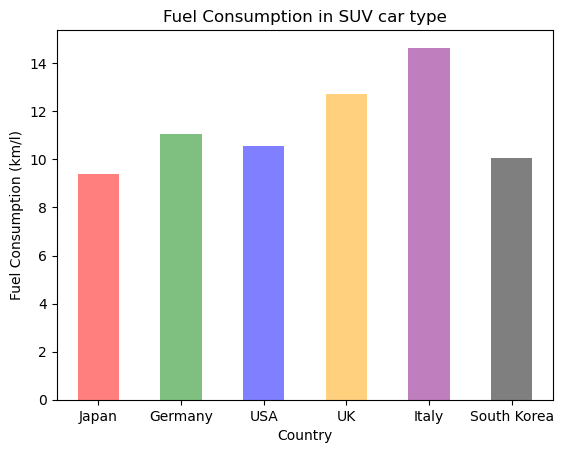

In [40]:
#Plotting chart for Fuel Consumption in SUV car type in every country
car_types_df.plot(kind = 'bar', x = 'Country', y = 'SUV Fuel Consumption', color=['red', 'green', 'blue', 'orange', 'purple','black'], alpha = 0.5, 
               xlabel = 'Country', ylabel = 'Fuel Consumption (km/l)', title = 'Fuel Consumption in SUV car type')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

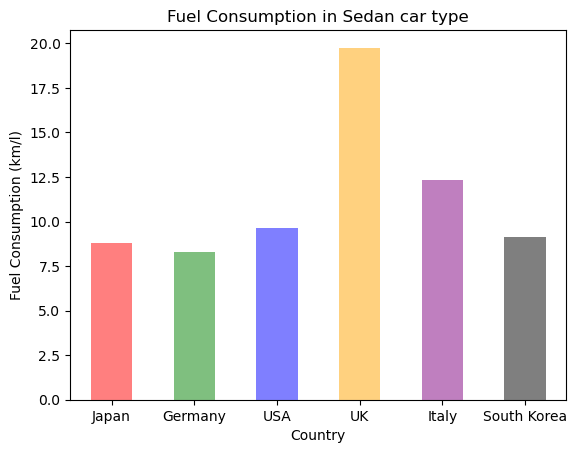

In [42]:
#Plotting chart for Fuel Consumption in Sedan car type in every country
car_types_df.plot(kind = 'bar', x = 'Country', y = 'Sedan Fuel Consumption', color=['red', 'green', 'blue', 'orange', 'purple','black'], alpha = 0.5, 
               xlabel = 'Country', ylabel = 'Fuel Consumption (km/l)', title = 'Fuel Consumption in Sedan car type')
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()

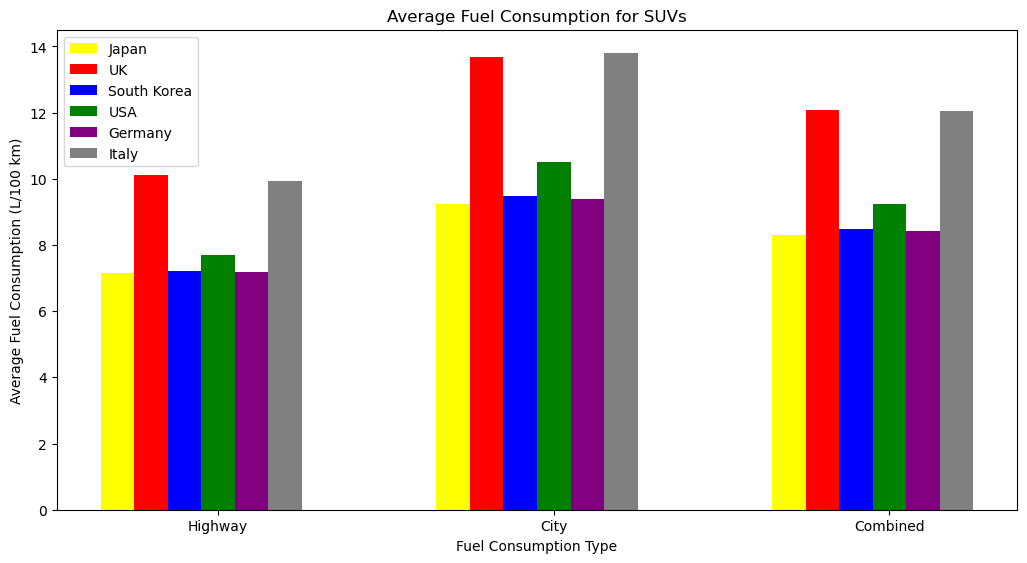

In [73]:
# Data for Japan
japan_suv_highway = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['HWY (L/100 km)'].mean()
japan_suv_city = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['FUEL CONSUMPTION'].mean()
japan_suv_combined = final_tweak_df[final_tweak_df['COUNTRY']== "Japan"]['COMB (L/100 km)'].mean()

# Data for UK
uk_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['HWY (L/100 km)'].mean()
uk_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['FUEL CONSUMPTION'].mean()
uk_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "UK"]['COMB (L/100 km)'].mean()

# Data for South Korea
korea_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['HWY (L/100 km)'].mean()
korea_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['FUEL CONSUMPTION'].mean()
korea_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "South Korea"]['COMB (L/100 km)'].mean()

# Data for USA
us_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['HWY (L/100 km)'].mean()
us_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['FUEL CONSUMPTION'].mean()
us_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "USA"]['COMB (L/100 km)'].mean()

# Data for Germany
ger_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['HWY (L/100 km)'].mean()
ger_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['FUEL CONSUMPTION'].mean()
ger_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "Germany"]['COMB (L/100 km)'].mean()

# Data for Italy
italy_suv_highway = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['HWY (L/100 km)'].mean()
italy_suv_city = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['FUEL CONSUMPTION'].mean()
italy_suv_combined = final_tweak_df[final_tweak_df['COUNTRY'] == "Italy"]['COMB (L/100 km)'].mean()

# Data for all countries
fuel_types = ['Highway', 'City', 'Combined']
japan_fuel_consumptions = [japan_suv_highway, japan_suv_city, japan_suv_combined]
uk_fuel_consumptions = [uk_suv_highway, uk_suv_city, uk_suv_combined]
korea_fuel_consumptions = [korea_suv_highway, korea_suv_city, korea_suv_combined]
us_fuel_consumptions = [us_suv_highway, us_suv_city, us_suv_combined]
ger_fuel_consumptions = [ger_suv_highway, ger_suv_city, ger_suv_combined]
italy_fuel_consumptions = [italy_suv_highway, italy_suv_city, italy_suv_combined]


# Set the width of the bars
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions of the bars on the x-axis
r1 = np.arange(len(fuel_types))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the grouped bar chart
plt.bar(r1, japan_fuel_consumptions, color='yellow', width=bar_width, label='Japan')
plt.bar(r2, uk_fuel_consumptions, color='red', width=bar_width, label='UK')
plt.bar(r3, korea_fuel_consumptions, color='blue', width=bar_width, label='South Korea')
plt.bar(r4, us_fuel_consumptions, color='green', width=bar_width, label='USA')
plt.bar(r5, ger_fuel_consumptions, color='purple', width=bar_width, label='Germany')
plt.bar(r6, italy_fuel_consumptions, color='grey', width=bar_width, label='Italy')

# Set axis labels, title, and ticks
plt.xlabel('Fuel Consumption Type')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.title('Average Fuel Consumption for SUVs')
ax.set_xticks([r + 3 * bar_width for r in range(len(fuel_types))])
ax.set_xticklabels(fuel_types)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) 

# Add legend
plt.legend()

# Show the chart
plt.show()